## Regression: Predict Fuel Efficiency of a Vehicle

### Task
- Given information about a car such as horsepower, cylinders, and weight...
- Predict miles per gallon, a measure of its fuel efficiency.

### Dataset
- https://archive.ics.uci.edu/ml/datasets/auto+mpg
- Multivariate = more than 1 FEATURE / attribute / input
- Instances: 398 (very small)
- Attribute Characteristics:
    Categorical: fixed number of values [0, 1], [0, 1, 2], [2, 3, 4]
    Real: real number
- Number of Attributes: 8
- Missing Values? Yes (may need to dropna, or interpolate)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [30]:
df = pd.read_csv('./auto-mpg/auto-mpg.data.txt', sep='\s+',
                names=['mpg', 'cylinders', 'displacement',
                       'horsepower', 'weight', 'acceleration',
                       'model_year', 'origin', 'car_name'], 
                na_values=['?'])

# Attribute Information:
#    1. mpg:           continuous
#    2. cylinders:     multi-valued discrete
#    3. displacement:  continuous
#    4. horsepower:    continuous
#    5. weight:        continuous
#    6. acceleration:  continuous
#    7. model year:    multi-valued discrete
#    8. origin:        multi-valued discrete
#    9. car name:      string (mostly unique for each instance)

# axis=1 drop columns
# axis=0 [default] drop rows
# inplace=True changes original df
# inplace=False returns a copy of the df
#df.drop(['car_name'], axis=1, inplace=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


## Data Cleaning

In [32]:
df.isna().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [33]:
# One way to print na rows
df[df.isna().values]

# df.isna().values returns a mask
# apply mask to original dataframe

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [34]:
# NaN values

# - drop  =>  dropna()
# - interpolate => interpolate()
# - fill with same value (mean, median, ...) => fillna()

In [35]:
index = df[df.isna().values].index

# original
df.iloc[index] # iloc integer column, else use loc 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [36]:
df1 = df.dropna()
df1.info()

# KeyError: "None of [Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')] are in the [index]"
# df1.loc[index] # rows are gone!!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [37]:
index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [38]:
df.iloc[index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [39]:
df2 = df.interpolate()
df2.iloc[index] # linear interpolation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,97.5,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,97.5,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,67.0,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,80.0,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,74.5,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,83.0,3035.0,20.5,82,1,amc concord dl


In [40]:
df2.iloc[30:35] # see the interpolation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
30,28.0,4,140.0,90.0,2264.0,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95.0,2228.0,14.0,71,3,toyota corona
32,25.0,4,98.0,97.5,2046.0,19.0,71,1,ford pinto
33,19.0,6,232.0,100.0,2634.0,13.0,71,1,amc gremlin
34,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom


In [41]:
df.corr()['horsepower']

mpg            -0.778427
cylinders       0.842983
displacement    0.897257
horsepower      1.000000
weight          0.864538
acceleration   -0.689196
model_year     -0.416361
origin         -0.455171
Name: horsepower, dtype: float64

In [42]:
# There is a strong correlation between horsepower and displacement
# Sort by displacement, then interpolate horsepower
df_sorted = df.sort_values('displacement')
df2 = df_sorted.interpolate()
#df2.iloc[30:35]

In [43]:
df3 = df.fillna(df.horsepower.mean()) # assumes only NA values are in horsepower column
df3.iloc[index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,104.469388,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,104.469388,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,104.469388,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,104.469388,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,104.469388,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,104.469388,3035.0,20.5,82,1,amc concord dl


In [44]:
# Fills per column (safer)
df4 = df.fillna({'horsepower': df.horsepower.mean()})
df4.iloc[index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,104.469388,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,104.469388,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,104.469388,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,104.469388,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,104.469388,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,104.469388,3035.0,20.5,82,1,amc concord dl


In [45]:
6/398

0.01507537688442211

In [46]:
# Drop NaN values because horsepower interpolation between different
# car models requires work (future enhancement)

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## Data Exploration

In [47]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


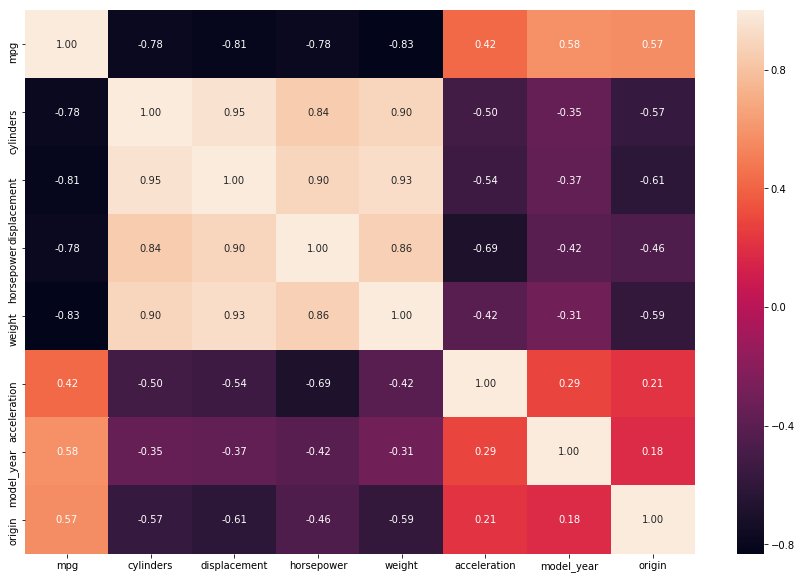

In [48]:
# another way to plot
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.2f')

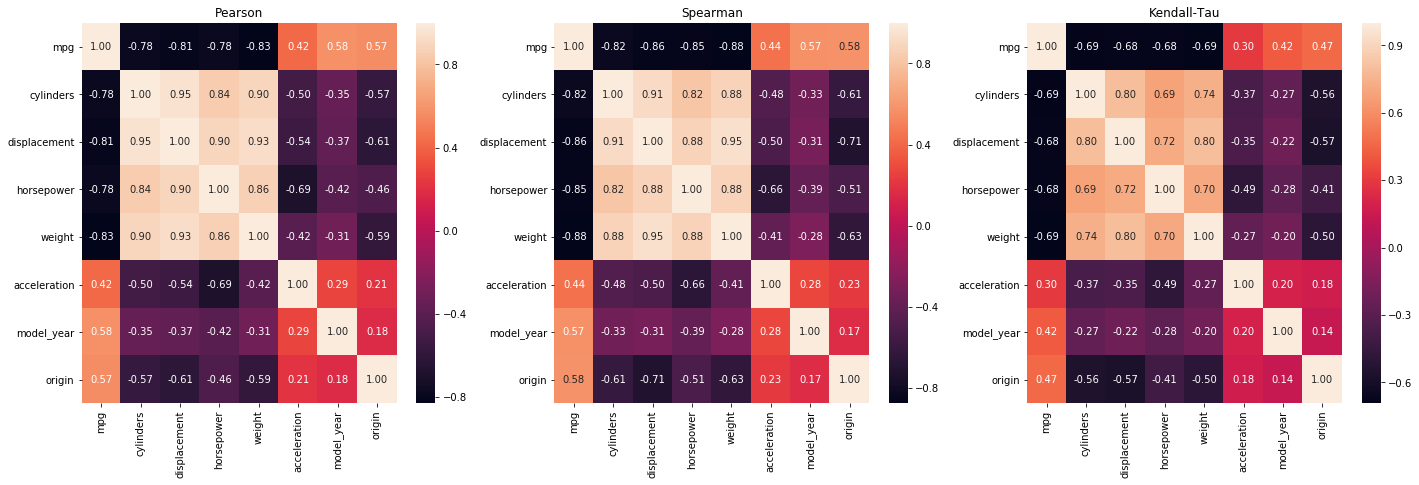

In [49]:
fig, ax = plt.subplots(ncols=3, figsize=(24, 7))
ax = ax.flatten()

sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
ax[0].set_title('Pearson')
sns.heatmap(df.corr(method='spearman'), ax=ax[1], annot=True, fmt='.2f')
ax[1].set_title('Spearman')
sns.heatmap(df.corr(method='kendall'), ax=ax[2], annot=True, fmt='.2f')
ax[2].set_title('Kendall-Tau')

plt.show()

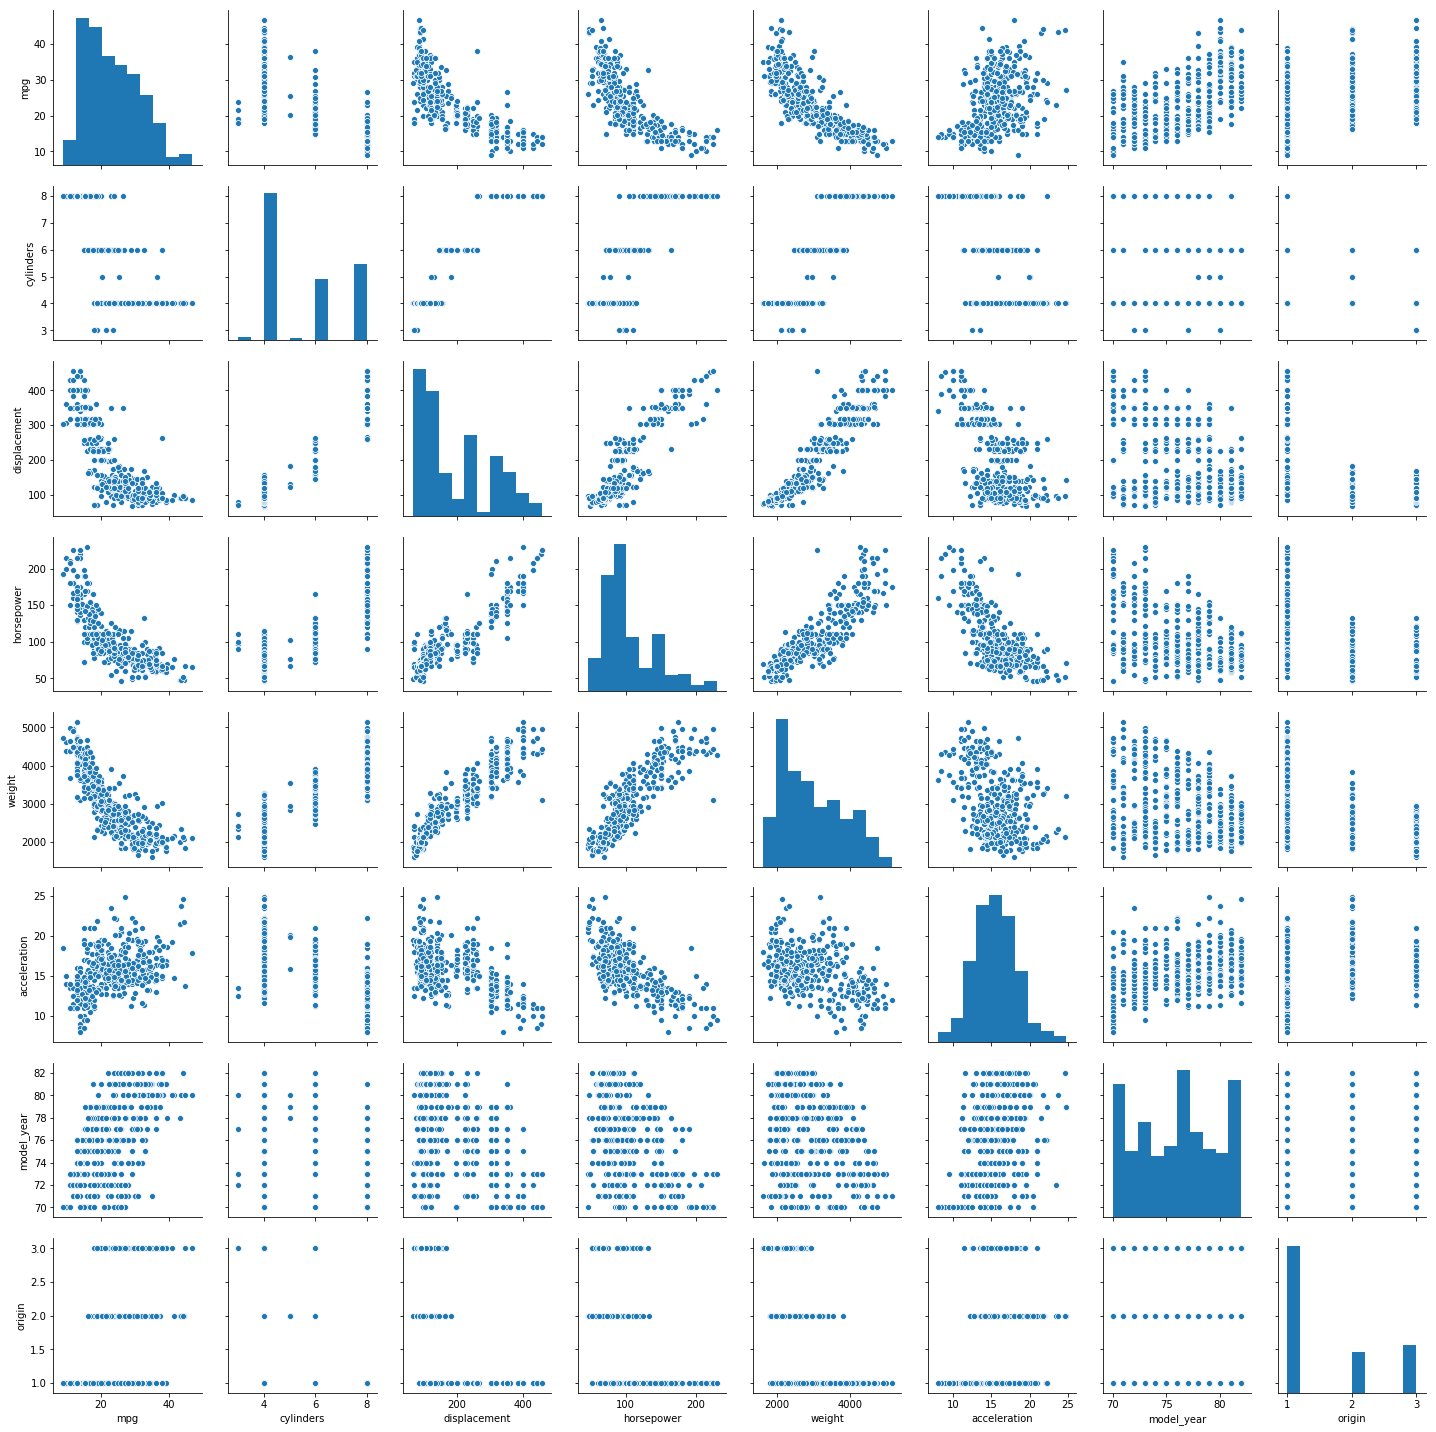

In [50]:
sns.pairplot(df)

## Feature Selection

In [51]:
# feature selection

# select cylinders to model_year
# loc[row_selector, col_selector]
X = df.loc[:, 'cylinders':'model_year'] # contiguous columns

y = df.mpg # less typing, doesn't work if col has space, () in name
#y = df['mpg'] # more flexible

X.columns # verify columns are correct

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

In [52]:
# df.loc[col_selector, row_selector]
df.loc[df.weight > 3500, ['cylinders', 'horsepower', 'weight']].columns

# all rows, cylinders to weight
#df.loc[:, 'cylinders':'weight'].columns

Index(['cylinders', 'horsepower', 'weight'], dtype='object')

In [53]:
# Example: non-contiguous columns (skip something in middle)
# skip mpg, weight, origin
df.loc[:, (df.columns != 'mpg') & (df.columns != 'weight') & (df.columns != 'origin')]

,cylinders,displacement,horsepower,acceleration,model_year,car_name
0,8,307.0,130.0,12.0,70,chevrolet chevelle malibu
1,8,350.0,165.0,11.5,70,buick skylark 320
2,8,318.0,150.0,11.0,70,plymouth satellite
3,8,304.0,150.0,12.0,70,amc rebel sst
4,8,302.0,140.0,10.5,70,ford torino
5,8,429.0,198.0,10.0,70,ford galaxie 500
6,8,454.0,220.0,9.0,70,chevrolet impala
7,8,440.0,215.0,8.5,70,plymouth fury iii
8,8,455.0,225.0,10.0,70,pontiac catalina
9,8,390.0,190.0,8.5,70,amc ambassador dpl


In [54]:
# SelectKBest demo
from sklearn.feature_selection import SelectKBest, f_regression

kbest = SelectKBest(f_regression, k=4)
X_kbest = kbest.fit_transform(X, y)

X_kbest.shape

(392, 4)

In [55]:
X.columns[kbest.get_support()]

Index(['cylinders', 'displacement', 'horsepower', 'weight'], dtype='object')

In [56]:
print(kbest.get_support())
print(X.columns)

# Any feature with pvalue below 0.05 should be selected
# Reason: https://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/
#
# (pvalue > 0.05 supports the null hypothesis that
# the feature should not be selected)

print(kbest.pvalues_)

[ True  True  True  True False False]
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'],
      dtype='object')
[1.31138364e-080 1.66064183e-090 7.03198903e-081 6.01529605e-102
 1.77857612e-018 1.07579356e-036]


## Feature Scaling

We will perform feature scaling.

Before features can be scaled, we need to holdout (separate out) the test dataset from the training dataset. 

In [57]:
# Train/test split

# train_test_split
# 1. shuffle using random_state (random number generator)
# 2. split rows into 2 sets: 75%, 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # split 75/25

In [58]:
X.shape

(392, 6)

In [59]:
X_train.shape

(294, 6)

In [60]:
print(X_test.shape)

(98, 6)


In [61]:
X_scaler = StandardScaler()

X_scaler.fit(X)
#X_scaler.fit_transform(X_test)

print('mean', X_scaler.mean_)
print('var', X_scaler.var_)

mean [   5.47193878  194.4119898   104.46938776 2977.58418367   15.54132653
   75.97959184]
var [2.90227379e+00 1.09224329e+04 1.47778988e+03 7.19644187e+05
 7.59191457e+00 1.35352978e+01]


C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [62]:
y_train.shape

(294,)

In [63]:
# rearranging
#      series  nparray        auto, 1              
temp = y_train.values.reshape(-1, 1)
temp.shape

(294, 1)

In [64]:
temp2 = y_train.values.reshape(-1, 2)
temp2.shape

(147, 2)

In [65]:
temp2

array([[27.5, 18. ],
       [11. , 17. ],
       [14. , 26. ],
       [34.2, 34.4],
       [35.1, 20. ],
       [22. , 18.2],
       [32. , 31.9],
       [21. , 22. ],
       [37.2, 32.9],
       [19.4, 15. ],
       [22. , 21. ],
       [37. , 21. ],
       [15. , 31. ],
       [23. , 24.5],
       [29. , 30.5],
       [15. , 34.7],
       [27. , 28. ],
       [19. , 41.5],
       [17.5, 29. ],
       [26. , 31.8],
       [18. , 16.5],
       [13. , 19. ],
       [30. , 20. ],
       [19. , 27. ],
       [23. , 14. ],
       [20.6, 27.9],
       [15. , 32. ],
       [12. , 23. ],
       [33.5, 25.5],
       [40.8, 16.5],
       [32.3, 44.3],
       [12. , 32.8],
       [24. , 18.1],
       [14. , 13. ],
       [11. , 18. ],
       [32. , 27.2],
       [16. , 17.5],
       [12. , 26. ],
       [14. , 28. ],
       [20. , 13. ],
       [27.2, 29. ],
       [19.1, 28. ],
       [27. , 19. ],
       [26. , 15.5],
       [13. , 38. ],
       [18. , 23.7],
       [24.5, 34. ],
       [23. ,

In [66]:
temp

array([[27.5],
       [18. ],
       [11. ],
       [17. ],
       [14. ],
       [26. ],
       [34.2],
       [34.4],
       [35.1],
       [20. ],
       [22. ],
       [18.2],
       [32. ],
       [31.9],
       [21. ],
       [22. ],
       [37.2],
       [32.9],
       [19.4],
       [15. ],
       [22. ],
       [21. ],
       [37. ],
       [21. ],
       [15. ],
       [31. ],
       [23. ],
       [24.5],
       [29. ],
       [30.5],
       [15. ],
       [34.7],
       [27. ],
       [28. ],
       [19. ],
       [41.5],
       [17.5],
       [29. ],
       [26. ],
       [31.8],
       [18. ],
       [16.5],
       [13. ],
       [19. ],
       [30. ],
       [20. ],
       [19. ],
       [27. ],
       [23. ],
       [14. ],
       [20.6],
       [27.9],
       [15. ],
       [32. ],
       [12. ],
       [23. ],
       [33.5],
       [25.5],
       [40.8],
       [16.5],
       [32.3],
       [44.3],
       [12. ],
       [32.8],
       [24. ],
       [18.1],
       [14

In [67]:
y_scaler = StandardScaler()

# StandardScaler expects multiple columns
# ValueError: Expected 2D array, got 1D array instead:
# array=[27.5 18.  11.  17.  14.  26.  34.2 34.4 35.1 20.  22.  18.2 32.  31.9
#       
# y_train_scaled = y_scaler.fit_transform(y_train)

In [68]:
# Scale X_train, X_test, y_train, y_test
from sklearn.preprocessing import StandardScaler

# Scaling both so that Mean Squared Error / Cost computes small numbers
# (better for training)
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# initialise and transform y_train
# reshape vector: from (294,) to (294, 1)
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# 75%
X_train_scaled = X_scaler.fit_transform(X_train) # (294, 6) ok (matrix)

# 25%: transform is done here because fit_transform
# will affect the X_scaler and influence the test result
X_test_scaled = X_scaler.transform(X_test)

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [69]:
# Visualise features using PCA

X_train_scaled.shape

(294, 6)

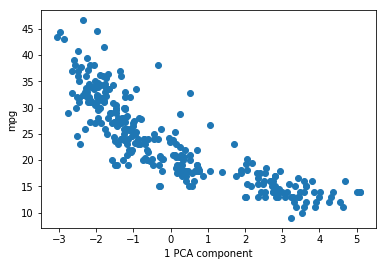

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

Z_train = pca.fit_transform(X_train_scaled)

fig, ax = plt.subplots()
ax.scatter(Z_train, y_train)
ax.set_ylabel('mpg')
ax.set_xlabel('1 PCA component')
plt.show()

## Train Model using Ordinary Least Squares Regression


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# training
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
print('beta1 ... 6', lr.coef_)
print('beta0', lr.intercept_)

# evaluation
print(lr.score(X_test_scaled, y_test_scaled)) # R-squared
y_pred = lr.predict(X_test_scaled)
print(mean_squared_error(y_test_scaled, y_pred))

beta1 ... 6 [[-0.03423113  0.00487854 -0.00914814 -0.67842997  0.02053692  0.34742948]]
beta0 [5.86085612e-17]
0.7987978489938274
0.1586415788228464


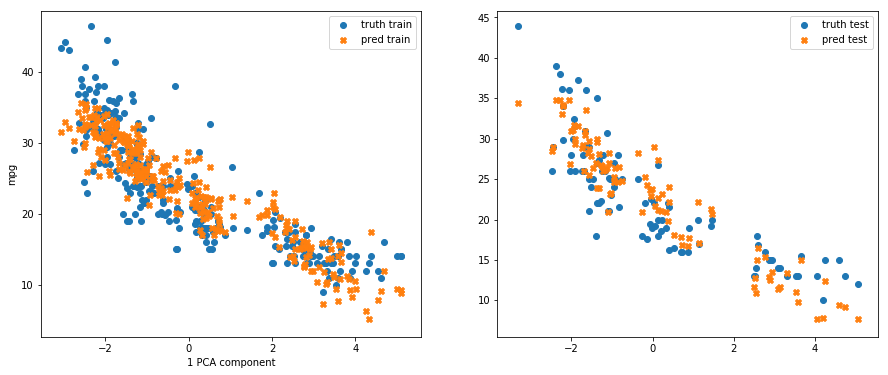

In [72]:
pca = PCA(n_components=1)

Z_train = pca.fit_transform(X_train_scaled)
Z_test = pca.transform(X_test_scaled)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax.flatten()
ax[0].scatter(Z_train, y_train, label='truth train')
ax[1].scatter(Z_test, y_test, label='truth test')
ax[0].set_ylabel('mpg')
ax[0].set_xlabel('1 PCA component')

# Plot predictions from trained Linear Regression model
y_pred_train_sc = lr.predict(X_train_scaled)
y_pred_test_sc = lr.predict(X_test_scaled)

y_pred_train = y_scaler.inverse_transform(y_pred_train_sc)
y_pred_test = y_scaler.inverse_transform(y_pred_test_sc)

ax[0].scatter(Z_train, y_pred_train, marker='X', label='pred train')
ax[1].scatter(Z_test, y_pred_test, marker='X', label='pred test')
ax[0].legend()
ax[1].legend()
plt.show()

In [73]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

In [74]:
# y_hat = 5.86085612e-17 + (-0.03423113 * x1) + (0.00487854 * x2) + (-0.00914814 x3) + ...

## Train Model

Let's try training a Linear Regression model, using Stochastic Gradient Descent.

We will perform cross-validation here as well, and plot the learning curve to see how our training went.

In [82]:
from sklearn.linear_model import SGDRegressor

SGDRegressor?

In [88]:
from sklearn.linear_model import SGDRegressor

# Stochastic Gradient Descent Regressor
model = SGDRegressor(random_state=42, verbose=True, tol=1e-4, max_iter=100,
                     eta0=0.001, learning_rate='invscaling')
    
model.fit(X_train_scaled, y_train_scaled) # fit / train
model.score(X_test_scaled, y_test_scaled) # evaluate with test set

-- Epoch 1
Norm: 0.13, NNZs: 6, Bias: 0.000436, T: 294, Avg. loss: 0.377156
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 6, Bias: 0.000457, T: 588, Avg. loss: 0.261912
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 6, Bias: 0.000441, T: 882, Avg. loss: 0.208425
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 6, Bias: 0.000358, T: 1176, Avg. loss: 0.178347
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.31, NNZs: 6, Bias: 0.000309, T: 1470, Avg. loss: 0.160037
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.33, NNZs: 6, Bias: 0.000315, T: 1764, Avg. loss: 0.148166
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.35, NNZs: 6, Bias: 0.000302, T: 2058, Avg. loss: 0.140144
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.36, NNZs: 6, Bias: 0.000292, T: 2352, Avg. loss: 0.134497
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.37, NNZs: 6, Bias: 0.000317, T: 2646, Avg. loss: 0.130428
Total training time: 0.00 seco

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7664257627010148

In [89]:
print(model.score(X_test_scaled, y_test_scaled))
print(model.coef_)
print(model.intercept_)

0.7664257627010148
[-0.15513568 -0.17881954 -0.15609266 -0.28184298 -0.02956909  0.27798363]
[8.66613254e-05]


In [96]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores, val_scores = learning_curve(
    SGDRegressor(random_state=42, verbose=True, tol=1e-4, max_iter=100,
                 learning_rate='constant', eta0=1e-4), # default is 0.01
    X_train_scaled, y_train_scaled.ravel(),
    cv=10,
    random_state=42,
    verbose=True)

[learning_curve] Training set sizes: [ 26  85 145 204 264]
-- Epoch 1
Norm: 0.00, NNZs: 6, Bias: -0.000206, T: 26, Avg. loss: 0.422346
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 6, Bias: -0.000412, T: 52, Avg. loss: 0.416554
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 6, Bias: -0.000619, T: 78, Avg. loss: 0.410889
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 6, Bias: -0.000824, T: 104, Avg. loss: 0.405344
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 6, Bias: -0.001032, T: 130, Avg. loss: 0.399921
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 6, Bias: -0.001239, T: 156, Avg. loss: 0.394611
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.03, NNZs: 6, Bias: -0.001448, T: 182, Avg. loss: 0.389415
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.03, NNZs: 6, Bias: -0.001656, T: 208, Avg. loss: 0.384329
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.03, NNZs: 6, Bias: -0.001865,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



-- Epoch 72
Norm: 0.44, NNZs: 6, Bias: -0.000117, T: 14688, Avg. loss: 0.118156
Total training time: 0.13 seconds.
-- Epoch 73
Norm: 0.44, NNZs: 6, Bias: 0.000008, T: 14892, Avg. loss: 0.118046
Total training time: 0.13 seconds.
-- Epoch 74
Norm: 0.44, NNZs: 6, Bias: 0.000132, T: 15096, Avg. loss: 0.117938
Total training time: 0.14 seconds.
-- Epoch 75
Norm: 0.44, NNZs: 6, Bias: 0.000249, T: 15300, Avg. loss: 0.117833
Total training time: 0.14 seconds.
-- Epoch 76
Norm: 0.44, NNZs: 6, Bias: 0.000360, T: 15504, Avg. loss: 0.117730
Total training time: 0.14 seconds.
-- Epoch 77
Norm: 0.44, NNZs: 6, Bias: 0.000472, T: 15708, Avg. loss: 0.117628
Total training time: 0.14 seconds.
-- Epoch 78
Norm: 0.44, NNZs: 6, Bias: 0.000583, T: 15912, Avg. loss: 0.117530
Total training time: 0.14 seconds.
-- Epoch 79
Norm: 0.44, NNZs: 6, Bias: 0.000690, T: 16116, Avg. loss: 0.117433
Total training time: 0.14 seconds.
-- Epoch 80
Norm: 0.44, NNZs: 6, Bias: 0.000797, T: 16320, Avg. loss: 0.117335
Total t

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



-- Epoch 38
Norm: 0.39, NNZs: 6, Bias: -0.000253, T: 5510, Avg. loss: 0.142324
Total training time: 0.09 seconds.
-- Epoch 39
Norm: 0.39, NNZs: 6, Bias: -0.000192, T: 5655, Avg. loss: 0.141670
Total training time: 0.09 seconds.
-- Epoch 40
Norm: 0.40, NNZs: 6, Bias: -0.000128, T: 5800, Avg. loss: 0.141063
Total training time: 0.09 seconds.
-- Epoch 41
Norm: 0.40, NNZs: 6, Bias: -0.000068, T: 5945, Avg. loss: 0.140495
Total training time: 0.09 seconds.
-- Epoch 42
Norm: 0.40, NNZs: 6, Bias: -0.000004, T: 6090, Avg. loss: 0.139962
Total training time: 0.09 seconds.
-- Epoch 43
Norm: 0.40, NNZs: 6, Bias: 0.000059, T: 6235, Avg. loss: 0.139461
Total training time: 0.09 seconds.
-- Epoch 44
Norm: 0.40, NNZs: 6, Bias: 0.000123, T: 6380, Avg. loss: 0.138991
Total training time: 0.09 seconds.
-- Epoch 45
Norm: 0.41, NNZs: 6, Bias: 0.000185, T: 6525, Avg. loss: 0.138549
Total training time: 0.09 seconds.
-- Epoch 46
Norm: 0.41, NNZs: 6, Bias: 0.000240, T: 6670, Avg. loss: 0.138133
Total traini

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



-- Epoch 8
Norm: 0.09, NNZs: 6, Bias: 0.003764, T: 680, Avg. loss: 0.315284
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 0.10, NNZs: 6, Bias: 0.004064, T: 765, Avg. loss: 0.303863
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 0.11, NNZs: 6, Bias: 0.004332, T: 850, Avg. loss: 0.293191
Total training time: 0.05 seconds.
-- Epoch 11
Norm: 0.12, NNZs: 6, Bias: 0.004570, T: 935, Avg. loss: 0.283195
Total training time: 0.05 seconds.
-- Epoch 12
Norm: 0.13, NNZs: 6, Bias: 0.004775, T: 1020, Avg. loss: 0.273841
Total training time: 0.05 seconds.
-- Epoch 13
Norm: 0.14, NNZs: 6, Bias: 0.004954, T: 1105, Avg. loss: 0.265085
Total training time: 0.05 seconds.
-- Epoch 14
Norm: 0.14, NNZs: 6, Bias: 0.005114, T: 1190, Avg. loss: 0.256879
Total training time: 0.05 seconds.
-- Epoch 15
Norm: 0.15, NNZs: 6, Bias: 0.005233, T: 1275, Avg. loss: 0.249203
Total training time: 0.05 seconds.
-- Epoch 16
Norm: 0.16, NNZs: 6, Bias: 0.005327, T: 1360, Avg. loss: 0.242010
Total training time: 0.

Norm: 0.49, NNZs: 6, Bias: 0.000091, T: 20592, Avg. loss: 0.103526
Total training time: 0.07 seconds.
-- Epoch 79
Norm: 0.49, NNZs: 6, Bias: 0.000055, T: 20856, Avg. loss: 0.103414
Total training time: 0.07 seconds.
-- Epoch 80
Norm: 0.49, NNZs: 6, Bias: 0.000025, T: 21120, Avg. loss: 0.103304
Total training time: 0.07 seconds.
-- Epoch 81
Norm: 0.49, NNZs: 6, Bias: -0.000008, T: 21384, Avg. loss: 0.103199
Total training time: 0.07 seconds.
-- Epoch 82
Norm: 0.49, NNZs: 6, Bias: -0.000053, T: 21648, Avg. loss: 0.103096
Total training time: 0.07 seconds.
-- Epoch 83
Norm: 0.49, NNZs: 6, Bias: -0.000082, T: 21912, Avg. loss: 0.102994
Total training time: 0.07 seconds.
-- Epoch 84
Norm: 0.49, NNZs: 6, Bias: -0.000126, T: 22176, Avg. loss: 0.102896
Total training time: 0.07 seconds.
-- Epoch 85
Norm: 0.49, NNZs: 6, Bias: -0.000159, T: 22440, Avg. loss: 0.102800
Total training time: 0.07 seconds.
-- Epoch 86
Norm: 0.49, NNZs: 6, Bias: -0.000194, T: 22704, Avg. loss: 0.102707
Total training 

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



-- Epoch 63
Norm: 0.48, NNZs: 6, Bias: 0.007624, T: 16632, Avg. loss: 0.103429
Total training time: 0.07 seconds.
-- Epoch 64
Norm: 0.48, NNZs: 6, Bias: 0.007712, T: 16896, Avg. loss: 0.103255
Total training time: 0.07 seconds.
-- Epoch 65
Norm: 0.48, NNZs: 6, Bias: 0.007795, T: 17160, Avg. loss: 0.103087
Total training time: 0.07 seconds.
-- Epoch 66
Norm: 0.48, NNZs: 6, Bias: 0.007879, T: 17424, Avg. loss: 0.102924
Total training time: 0.07 seconds.
-- Epoch 67
Norm: 0.48, NNZs: 6, Bias: 0.007964, T: 17688, Avg. loss: 0.102766
Total training time: 0.07 seconds.
-- Epoch 68
Norm: 0.48, NNZs: 6, Bias: 0.008041, T: 17952, Avg. loss: 0.102611
Total training time: 0.07 seconds.
-- Epoch 69
Norm: 0.49, NNZs: 6, Bias: 0.008128, T: 18216, Avg. loss: 0.102463
Total training time: 0.07 seconds.
-- Epoch 70
Norm: 0.49, NNZs: 6, Bias: 0.008189, T: 18480, Avg. loss: 0.102319
Total training time: 0.07 seconds.
-- Epoch 71
Norm: 0.49, NNZs: 6, Bias: 0.008257, T: 18744, Avg. loss: 0.102179
Total tr

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 8
Norm: 0.21, NNZs: 6, Bias: -0.009166, T: 1632, Avg. loss: 0.213413
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 0.22, NNZs: 6, Bias: -0.010012, T: 1836, Avg. loss: 0.197965
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 0.24, NNZs: 6, Bias: -0.010840, T: 2040, Avg. loss: 0.185027
Total training time: 0.05 seconds.
-- Epoch 11
Norm: 0.25, NNZs: 6, Bias: -0.011616, T: 2244, Avg. loss: 0.174149
Total training time: 0.05 seconds.
-- Epoch 12
Norm: 0.27, NNZs: 6, Bias: -0.012332, T: 2448, Avg. loss: 0.164966
Total training time: 0.05 seconds.
-- Epoch 13
Norm: 0.28, NNZs: 6, Bias: -0.013036, T: 2652, Avg. loss: 0.157225
Total training time: 0.05 seconds.
-- Epoch 14
Norm: 0.29, NNZs: 6, Bias: -0.013693, T: 2856, Avg. loss: 0.150707
Total training time: 0.05 seconds.
-- Epoch 15
Norm: 0.30, NNZs: 6, Bias: -0.014302, T: 3060, Avg. loss: 0.145219
Total training time: 0.05 seconds.
-- Epoch 16
Norm: 0.31, NNZs: 6, Bias: -0.014903, T: 3264, Avg. loss: 0.140573
Total train

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Norm: 0.38, NNZs: 6, Bias: -0.014509, T: 5695, Avg. loss: 0.121681
Total training time: 0.07 seconds.
-- Epoch 68
Norm: 0.38, NNZs: 6, Bias: -0.014749, T: 5780, Avg. loss: 0.121193
Total training time: 0.07 seconds.
-- Epoch 69
Norm: 0.38, NNZs: 6, Bias: -0.014988, T: 5865, Avg. loss: 0.120718
Total training time: 0.07 seconds.
-- Epoch 70
Norm: 0.39, NNZs: 6, Bias: -0.015230, T: 5950, Avg. loss: 0.120258
Total training time: 0.07 seconds.
-- Epoch 71
Norm: 0.39, NNZs: 6, Bias: -0.015467, T: 6035, Avg. loss: 0.119813
Total training time: 0.07 seconds.
-- Epoch 72
Norm: 0.39, NNZs: 6, Bias: -0.015703, T: 6120, Avg. loss: 0.119379
Total training time: 0.07 seconds.
-- Epoch 73
Norm: 0.39, NNZs: 6, Bias: -0.015938, T: 6205, Avg. loss: 0.118957
Total training time: 0.07 seconds.
-- Epoch 74
Norm: 0.39, NNZs: 6, Bias: -0.016169, T: 6290, Avg. loss: 0.118546
Total training time: 0.07 seconds.
-- Epoch 75
Norm: 0.39, NNZs: 6, Bias: -0.016400, T: 6375, Avg. loss: 0.118146
Total training time:

Norm: 0.21, NNZs: 6, Bias: 0.008738, T: 1794, Avg. loss: 0.214169
Total training time: 0.05 seconds.
-- Epoch 70
Norm: 0.22, NNZs: 6, Bias: 0.008772, T: 1820, Avg. loss: 0.212256
Total training time: 0.05 seconds.
-- Epoch 71
Norm: 0.22, NNZs: 6, Bias: 0.008804, T: 1846, Avg. loss: 0.210376
Total training time: 0.05 seconds.
-- Epoch 72
Norm: 0.22, NNZs: 6, Bias: 0.008835, T: 1872, Avg. loss: 0.208528
Total training time: 0.05 seconds.
-- Epoch 73
Norm: 0.22, NNZs: 6, Bias: 0.008864, T: 1898, Avg. loss: 0.206713
Total training time: 0.05 seconds.
-- Epoch 74
Norm: 0.22, NNZs: 6, Bias: 0.008892, T: 1924, Avg. loss: 0.204928
Total training time: 0.05 seconds.
-- Epoch 75
Norm: 0.23, NNZs: 6, Bias: 0.008918, T: 1950, Avg. loss: 0.203173
Total training time: 0.05 seconds.
-- Epoch 76
Norm: 0.23, NNZs: 6, Bias: 0.008942, T: 1976, Avg. loss: 0.201448
Total training time: 0.05 seconds.
-- Epoch 77
Norm: 0.23, NNZs: 6, Bias: 0.008964, T: 2002, Avg. loss: 0.199752
Total training time: 0.05 seco

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Norm: 0.06, NNZs: 6, Bias: 0.003414, T: 416, Avg. loss: 0.385300
Total training time: 0.00 seconds.
-- Epoch 17
Norm: 0.07, NNZs: 6, Bias: 0.003594, T: 442, Avg. loss: 0.380271
Total training time: 0.00 seconds.
-- Epoch 18
Norm: 0.07, NNZs: 6, Bias: 0.003771, T: 468, Avg. loss: 0.375336
Total training time: 0.00 seconds.
-- Epoch 19
Norm: 0.07, NNZs: 6, Bias: 0.003943, T: 494, Avg. loss: 0.370494
Total training time: 0.00 seconds.
-- Epoch 20
Norm: 0.08, NNZs: 6, Bias: 0.004111, T: 520, Avg. loss: 0.365744
Total training time: 0.00 seconds.
-- Epoch 21
Norm: 0.08, NNZs: 6, Bias: 0.004273, T: 546, Avg. loss: 0.361082
Total training time: 0.00 seconds.
-- Epoch 22
Norm: 0.08, NNZs: 6, Bias: 0.004434, T: 572, Avg. loss: 0.356506
Total training time: 0.00 seconds.
-- Epoch 23
Norm: 0.09, NNZs: 6, Bias: 0.004591, T: 598, Avg. loss: 0.352017
Total training time: 0.00 seconds.
-- Epoch 24
Norm: 0.09, NNZs: 6, Bias: 0.004747, T: 624, Avg. loss: 0.347612
Total training time: 0.00 seconds.
-- E

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Norm: 0.41, NNZs: 6, Bias: -0.007134, T: 7344, Avg. loss: 0.128976
Total training time: 0.01 seconds.
-- Epoch 37
Norm: 0.41, NNZs: 6, Bias: -0.007073, T: 7548, Avg. loss: 0.128517
Total training time: 0.01 seconds.
-- Epoch 38
Norm: 0.41, NNZs: 6, Bias: -0.007013, T: 7752, Avg. loss: 0.128081
Total training time: 0.01 seconds.
-- Epoch 39
Norm: 0.41, NNZs: 6, Bias: -0.006945, T: 7956, Avg. loss: 0.127667
Total training time: 0.01 seconds.
-- Epoch 40
Norm: 0.42, NNZs: 6, Bias: -0.006877, T: 8160, Avg. loss: 0.127267
Total training time: 0.01 seconds.
-- Epoch 41
Norm: 0.42, NNZs: 6, Bias: -0.006807, T: 8364, Avg. loss: 0.126889
Total training time: 0.01 seconds.
-- Epoch 42
Norm: 0.42, NNZs: 6, Bias: -0.006741, T: 8568, Avg. loss: 0.126524
Total training time: 0.01 seconds.
-- Epoch 43
Norm: 0.42, NNZs: 6, Bias: -0.006673, T: 8772, Avg. loss: 0.126173
Total training time: 0.01 seconds.
-- Epoch 44
Norm: 0.42, NNZs: 6, Bias: -0.006606, T: 8976, Avg. loss: 0.125833
Total training time:

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Norm: 0.15, NNZs: 6, Bias: -0.001195, T: 1105, Avg. loss: 0.273262
Total training time: 0.00 seconds.
-- Epoch 14
Norm: 0.16, NNZs: 6, Bias: -0.001354, T: 1190, Avg. loss: 0.263126
Total training time: 0.00 seconds.
-- Epoch 15
Norm: 0.17, NNZs: 6, Bias: -0.001534, T: 1275, Avg. loss: 0.253709
Total training time: 0.00 seconds.
-- Epoch 16
Norm: 0.18, NNZs: 6, Bias: -0.001720, T: 1360, Avg. loss: 0.244953
Total training time: 0.00 seconds.
-- Epoch 17
Norm: 0.19, NNZs: 6, Bias: -0.001911, T: 1445, Avg. loss: 0.236818
Total training time: 0.00 seconds.
-- Epoch 18
Norm: 0.20, NNZs: 6, Bias: -0.002106, T: 1530, Avg. loss: 0.229244
Total training time: 0.00 seconds.
-- Epoch 19
Norm: 0.20, NNZs: 6, Bias: -0.002311, T: 1615, Avg. loss: 0.222185
Total training time: 0.00 seconds.
-- Epoch 20
Norm: 0.21, NNZs: 6, Bias: -0.002519, T: 1700, Avg. loss: 0.215623
Total training time: 0.00 seconds.
-- Epoch 21
Norm: 0.22, NNZs: 6, Bias: -0.002736, T: 1785, Avg. loss: 0.209498
Total training time: 

Total training time: 0.12 seconds.
-- Epoch 77
Norm: 0.46, NNZs: 6, Bias: -0.004825, T: 15708, Avg. loss: 0.118661
Total training time: 0.12 seconds.
-- Epoch 78
Norm: 0.46, NNZs: 6, Bias: -0.004795, T: 15912, Avg. loss: 0.118522
Total training time: 0.12 seconds.
-- Epoch 79
Norm: 0.46, NNZs: 6, Bias: -0.004754, T: 16116, Avg. loss: 0.118387
Total training time: 0.12 seconds.
-- Epoch 80
Norm: 0.46, NNZs: 6, Bias: -0.004714, T: 16320, Avg. loss: 0.118255
Total training time: 0.12 seconds.
-- Epoch 81
Norm: 0.46, NNZs: 6, Bias: -0.004689, T: 16524, Avg. loss: 0.118126
Total training time: 0.12 seconds.
-- Epoch 82
Norm: 0.46, NNZs: 6, Bias: -0.004658, T: 16728, Avg. loss: 0.117999
Total training time: 0.12 seconds.
-- Epoch 83
Norm: 0.46, NNZs: 6, Bias: -0.004628, T: 16932, Avg. loss: 0.117876
Total training time: 0.12 seconds.
-- Epoch 84
Norm: 0.46, NNZs: 6, Bias: -0.004600, T: 17136, Avg. loss: 0.117754
Total training time: 0.12 seconds.
-- Epoch 85
Norm: 0.46, NNZs: 6, Bias: -0.004

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Total training time: 0.11 seconds.
-- Epoch 28
Norm: 0.35, NNZs: 6, Bias: 0.006059, T: 4060, Avg. loss: 0.163851
Total training time: 0.11 seconds.
-- Epoch 29
Norm: 0.35, NNZs: 6, Bias: 0.006081, T: 4205, Avg. loss: 0.162163
Total training time: 0.12 seconds.
-- Epoch 30
Norm: 0.36, NNZs: 6, Bias: 0.006099, T: 4350, Avg. loss: 0.160625
Total training time: 0.12 seconds.
-- Epoch 31
Norm: 0.36, NNZs: 6, Bias: 0.006101, T: 4495, Avg. loss: 0.159225
Total training time: 0.12 seconds.
-- Epoch 32
Norm: 0.36, NNZs: 6, Bias: 0.006105, T: 4640, Avg. loss: 0.157949
Total training time: 0.12 seconds.
-- Epoch 33
Norm: 0.37, NNZs: 6, Bias: 0.006103, T: 4785, Avg. loss: 0.156773
Total training time: 0.12 seconds.
-- Epoch 34
Norm: 0.37, NNZs: 6, Bias: 0.006092, T: 4930, Avg. loss: 0.155693
Total training time: 0.12 seconds.
-- Epoch 35
Norm: 0.37, NNZs: 6, Bias: 0.006082, T: 5075, Avg. loss: 0.154693
Total training time: 0.12 seconds.
-- Epoch 36
Norm: 0.38, NNZs: 6, Bias: 0.006069, T: 5220, Avg

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.8s finished


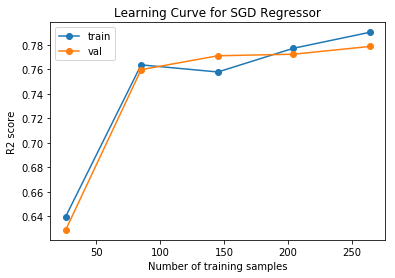

In [97]:
fig, ax = plt.subplots()

# plot number of samples vs. mean train scores
ax.plot(train_sizes_abs, train_scores.mean(axis=1), label='train', marker='o')

# plot number of samples vs. mean val scores
ax.plot(train_sizes_abs, val_scores.mean(axis=1), label='val', marker='o')

ax.legend()
ax.set_title('Learning Curve for SGD Regressor')
ax.set_ylabel('R2 score')
ax.set_xlabel('Number of training samples')
plt.show()

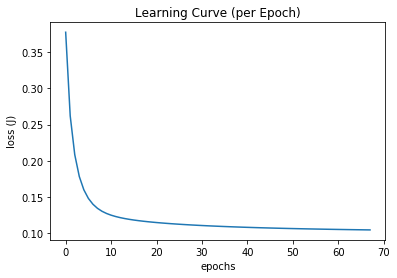

In [138]:
import re

losses = []

with open('./sgd_loss.txt', 'r') as f:
    for l in f.readlines():
        match = re.search('loss: (.+)', l.strip())
        if match:
            losses.append(float(match.groups()[0]))

fig, ax = plt.subplots()
ax.plot(losses)
ax.set_title('Learning Curve (per Epoch)')
ax.set_xlabel('epochs')
ax.set_ylabel('loss (J)')
plt.show()

In [140]:
losses

[0.377156,
 0.261912,
 0.208425,
 0.178347,
 0.160037,
 0.148166,
 0.140144,
 0.134497,
 0.130428,
 0.127404,
 0.125061,
 0.12322,
 0.121685,
 0.120412,
 0.119321,
 0.118373,
 0.11754,
 0.116789,
 0.11611,
 0.11549,
 0.114917,
 0.114384,
 0.113888,
 0.113423,
 0.112986,
 0.112572,
 0.112184,
 0.111814,
 0.111462,
 0.111127,
 0.110808,
 0.110505,
 0.110213,
 0.109937,
 0.109672,
 0.109417,
 0.109175,
 0.108941,
 0.108717,
 0.108502,
 0.108295,
 0.108095,
 0.107904,
 0.107721,
 0.107544,
 0.107373,
 0.107207,
 0.107048,
 0.106894,
 0.106746,
 0.106602,
 0.106464,
 0.10633,
 0.106201,
 0.106074,
 0.105953,
 0.105836,
 0.105721,
 0.105609,
 0.105504,
 0.1054,
 0.105299,
 0.105199,
 0.105105,
 0.105013,
 0.104923,
 0.104835,
 0.10475]

In [139]:
m = re.search('loss: (.+)', 'Norm: 0.20, NNZs: 6, Bias: 0.000457, T: 588, Avg. loss: 0.261912')

print(m.groups()[0])

0.261912 sdfsfsfds


## Deployment and Prediction

Inventory (what's needed for prediction):
1. Scaler for X: use for scaling inputs before passing to model
2. Model: use for getting the prediction
3. Scaler for y: use for converting raw predictions to actual values

In [79]:
# save model for later use
import pickle

pickle.dump(X_scaler, open('01_autompg_X_scaler.pickle', 'wb'))
pickle.dump(y_scaler, open('01_autompg_y_scaler.pickle', 'wb'))
pickle.dump(model, open('01_autompg_model.pickle', 'wb'))

In [ ]:
#my_model = {
#    'X_scaler': X_scaler,
#    'y_scaler': y_scaler,
#    'model' : model,
#    'name' : 'lisa'
#}
#
#pickle.dump(my_model, open('everything_in_one.pk', 'wb'))
#
#my_model2 = pickle.load(open('everything_in_one.pk', 'rb'))
#my_model2['X_scaler'].transform(...)

In [80]:
# load model in deployment

X_scaler1 = pickle.load(open('01_autompg_X_scaler.pickle', 'rb'))
y_scaler1 = pickle.load(open('01_autompg_y_scaler.pickle', 'rb'))
model1 = pickle.load(open('01_autompg_model.pickle', 'rb'))

# imagine we have test data
test_data = X_test[:10]
test_targets = y_test[:10]

Z_test_data = X_scaler1.transform(test_data)
y_test_pred = y_scaler.inverse_transform(model1.predict(Z_test_data).reshape(-1, 1))

print('Truth', test_targets.values)
print('Predictions', y_test_pred.flatten())

Truth [26.  21.6 36.1 26.  27.  28.  13.  26.  19.  29. ]
Predictions [26.6408165  27.0329776  31.83635715 26.48734523 30.17371472 29.09622948
  9.33317078 29.2618256  21.69315388 29.02127819]


C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


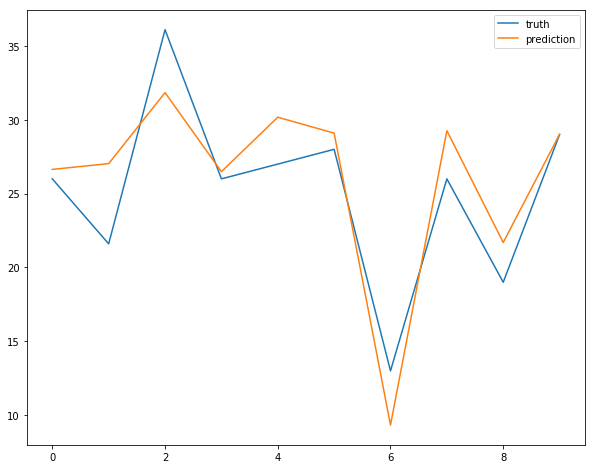

In [81]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(test_targets.values, label='truth')
ax.plot(y_test_pred, label='prediction')
ax.legend()